# Mann-Whitney U

In [ ]:
from pathlib import Path
import pickle
from scipy.stats import mannwhitneyu

from src.utils.utils import flatten_recursive
from src.stats_comp import compatibility_corpus

# Compute outcomes and pickle them for future use

corpus_path = Path('data/compiled/triads')
prose_baseline_corpus_path = Path('data/compiled/baselines/triads/prose')
lyric_baseline_corpus_path = Path('data/compiled/baselines/triads/lyric')

corpus_score_pickle_path = Path('data/cache/all_comp_ratios.pkl')
prose_baseline_score_pickle_path = Path('data/cache/all_comp_ratios_bl_prose.pkl')
lyric_baseline_score_pickle_path = Path('data/cache/all_comp_ratios_bl_lyric.pkl')

if corpus_score_pickle_path.exists():
    with open(corpus_score_pickle_path, 'rb') as f:
        all_corpus_comp_scores = pickle.load(f)
else:
    all_corpus_comp_scores = compatibility_corpus(corpus_path)
    with open(corpus_score_pickle_path, 'wb') as f:
        pickle.dump(all_corpus_comp_scores, f)

if prose_baseline_score_pickle_path.exists():
    with open(prose_baseline_score_pickle_path, 'rb') as f:
        all_corpus_comp_prose_baseline_scores = pickle.load(f)
else:
    all_corpus_comp_prose_baseline_scores = compatibility_corpus(prose_baseline_corpus_path)
    with open(prose_baseline_score_pickle_path, 'wb') as f:
        pickle.dump(all_corpus_comp_prose_baseline_scores, f)
if lyric_baseline_score_pickle_path.exists():
    with open(lyric_baseline_score_pickle_path, 'rb') as f:
        all_corpus_comp_lyric_baseline_scores = pickle.load(f)
else:
    all_corpus_comp_lyric_baseline_scores = compatibility_corpus(lyric_baseline_corpus_path)
    with open(lyric_baseline_score_pickle_path, 'wb') as f:
        pickle.dump(all_corpus_comp_lyric_baseline_scores, f)

outcomes = list(flatten_recursive(all_corpus_comp_scores))
outcomes_prose_baseline = list(flatten_recursive(all_corpus_comp_prose_baseline_scores))
outcomes_lyric_baseline = list(flatten_recursive(all_corpus_comp_lyric_baseline_scores))

def mann_whitney_summary(x, y, label_x="Model", label_y="Baseline"):
    """
    Computes Mann–Whitney U test and probability of superiority (AUC).
    """
    # Two-sided test: distributions differ
    U, p_value = mannwhitneyu(x, y, alternative="two-sided")

    n_x = len(x)
    n_y = len(y)

    # Probability of superiority (AUC)
    auc = U / (n_x * n_y)

    print(f"\nMann–Whitney U test: {label_x} vs {label_y}")
    print(f"  U statistic              : {U:.3e}")
    print(f"  p-value (two-sided)      : {p_value:.3e}")
    print(f"  Pr({label_x} > {label_y}) ≈ {auc:.4f}")

    return U, p_value, auc

# Model vs prose baseline
U_prose, p_prose, auc_prose = mann_whitney_summary(
    outcomes,
    outcomes_prose_baseline,
    label_x="Model",
    label_y="Prose baseline",
)

# Model vs lyric baseline
U_lyric, p_lyric, auc_lyric = mann_whitney_summary(
    outcomes,
    outcomes_lyric_baseline,
    label_x="Model",
    label_y="Lyric baseline",
)



Mann–Whitney U test: Model vs Prose baseline
  U statistic              : 6.231e+09
  p-value (two-sided)      : 1.824e-48
  Pr(Model > Prose baseline) ≈ 0.5396

Mann–Whitney U test: Model vs Lyric baseline
  U statistic              : 6.214e+09
  p-value (two-sided)      : 3.867e-45
  Pr(Model > Lyric baseline) ≈ 0.5381


# χ-square

In [2]:
from pathlib import Path
import pickle

from src.stats_comp import compatibility_corpus
from src.utils.utils import make_chisquare_test

corpus_path = Path('data/compiled/triads')
prose_baseline_corpus_path = Path('data/compiled/baselines/triads/prose')
lyric_baseline_corpus_path = Path('data/compiled/baselines/triads/lyric')

corpus_score_pickle_path = Path('data/all_comp_ratios.pkl')
prose_baseline_score_pickle_path = Path('data/all_comp_ratios_bl_prose.pkl')
lyric_baseline_score_pickle_path = Path('data/all_comp_ratios_bl_lyric.pkl')

if corpus_score_pickle_path.exists():
    with open(corpus_score_pickle_path, 'rb') as f:
        all_corpus_comp_scores = pickle.load(f)
else:
    all_corpus_comp_scores = compatibility_corpus(corpus_path)
    with open(corpus_score_pickle_path, 'wb') as f:
        pickle.dump(all_corpus_comp_scores, f)

if prose_baseline_score_pickle_path.exists():
    with open(prose_baseline_score_pickle_path, 'rb') as f:
        all_corpus_comp_prose_baseline_scores = pickle.load(f)
else:
    all_corpus_comp_prose_baseline_scores = compatibility_corpus(prose_baseline_corpus_path)
    with open(prose_baseline_score_pickle_path, 'wb') as f:
        pickle.dump(all_corpus_comp_prose_baseline_scores, f)
if lyric_baseline_score_pickle_path.exists():
    with open(lyric_baseline_score_pickle_path, 'rb') as f:
        all_corpus_comp_lyric_baseline_scores = pickle.load(f)
else:
    all_corpus_comp_lyric_baseline_scores = compatibility_corpus(lyric_baseline_corpus_path)
    with open(lyric_baseline_score_pickle_path, 'wb') as f:
        pickle.dump(all_corpus_comp_lyric_baseline_scores, f)

# Output
chi2_stat_prose, degrees_of_freedom_prose, p_value_prose, sorted_keys_prose, obs_counts_prose, obs_total_prose, exp_counts_prose = make_chisquare_test(all_corpus_comp_scores, all_corpus_comp_prose_baseline_scores)
print(f"\033[33mAgainst prose baseline:\033[0m")
print(f"Chi-square statistic: {chi2_stat_prose:.4f}")
print(f"Degrees of freedom: {degrees_of_freedom_prose}")
print(f"P-value: {p_value_prose:.3e}")

chi2_stat_lyr, degrees_of_freedom_lyr, p_value_lyr, sorted_keys_lyr, obs_counts_lyr, obs_total_lyr, exp_counts_lyr = make_chisquare_test(all_corpus_comp_scores, all_corpus_comp_lyric_baseline_scores)
print(f"\033[33mAgainst lyric baseline:\033[0m")
print(f"Chi-square statistic: {chi2_stat_lyr:.4f}")
print(f"Degrees of freedom: {degrees_of_freedom_lyr}")
print(f"P-value: {p_value_lyr:.3e}")

Against prose baseline:
Chi-square statistic: 304.4985
Degrees of freedom: 22
P-value: 1.493e-51
Against lyric baseline:
Chi-square statistic: 341.3295
Degrees of freedom: 22
P-value: 4.666e-59


## Box plot of distribution 

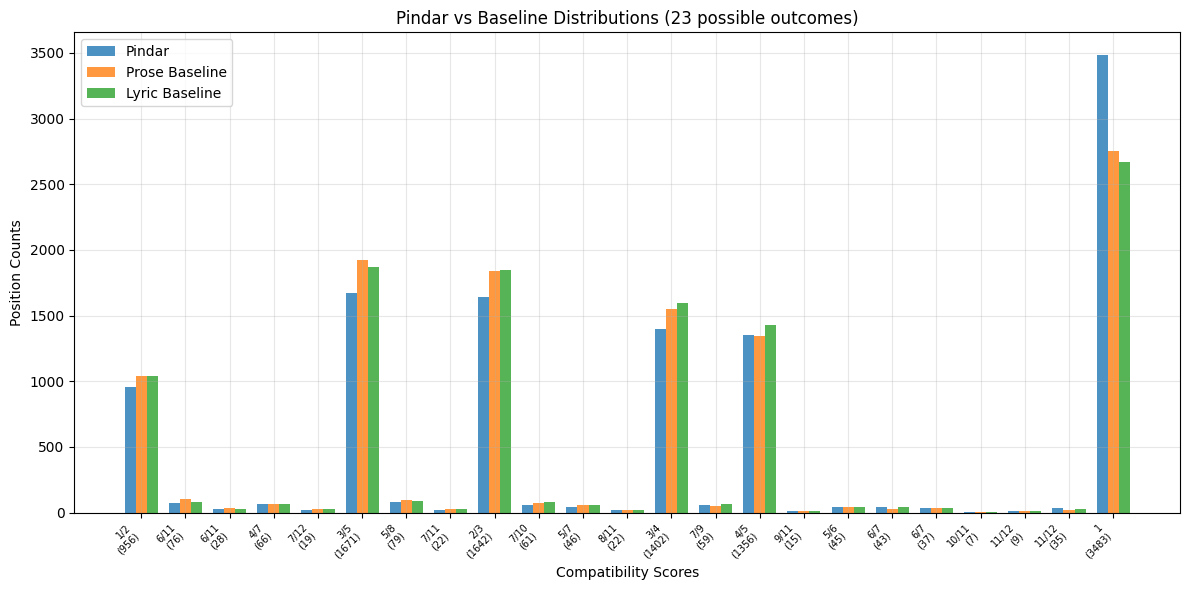

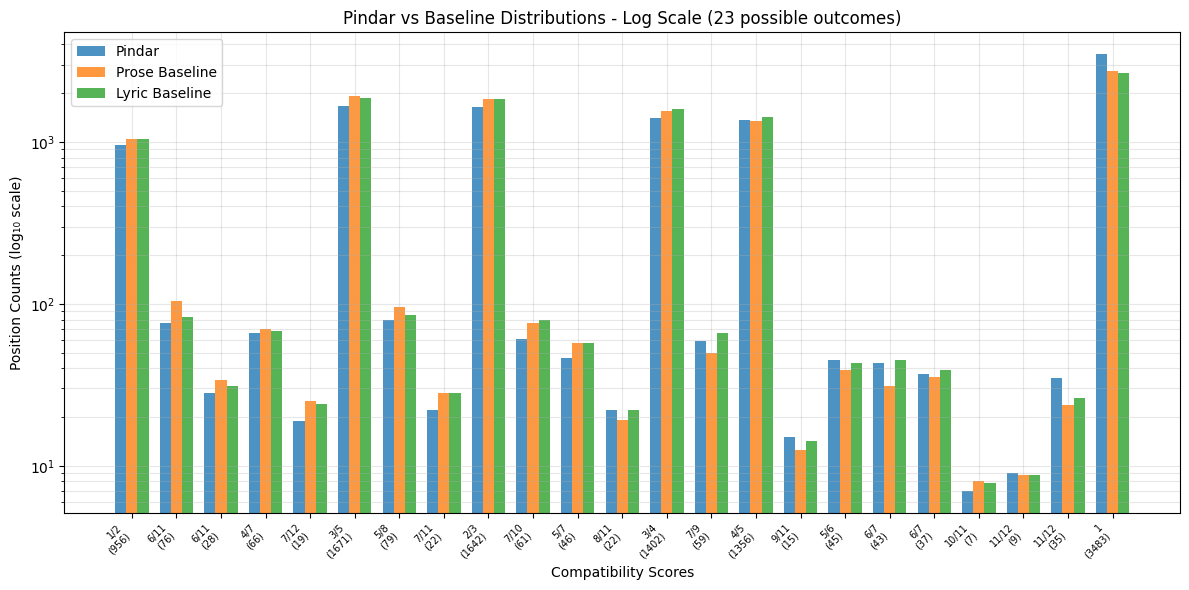

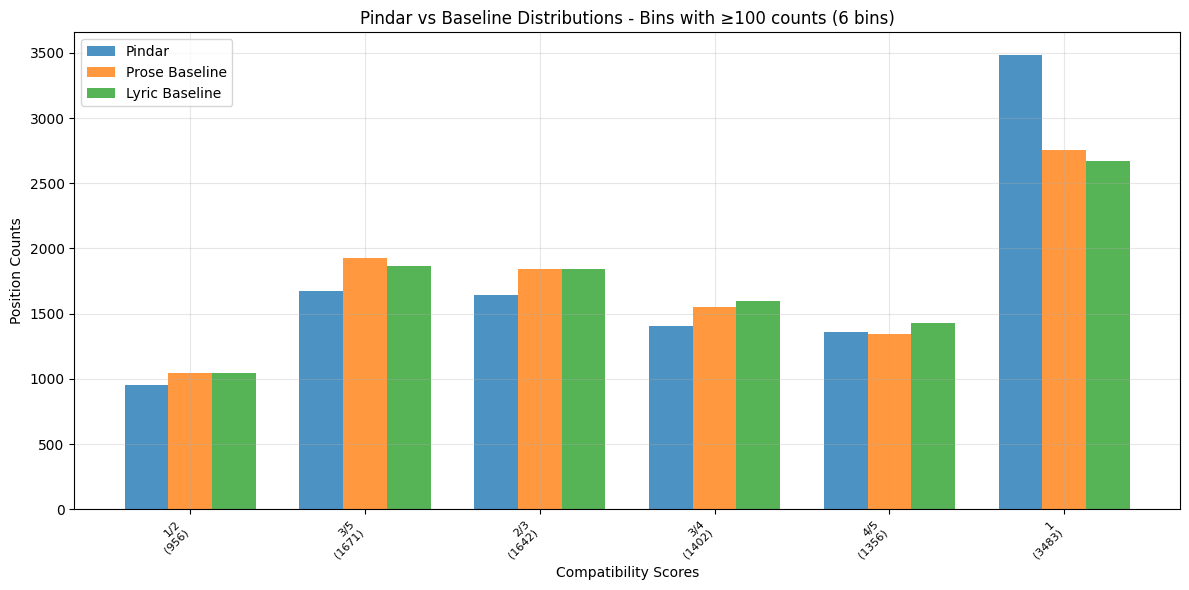

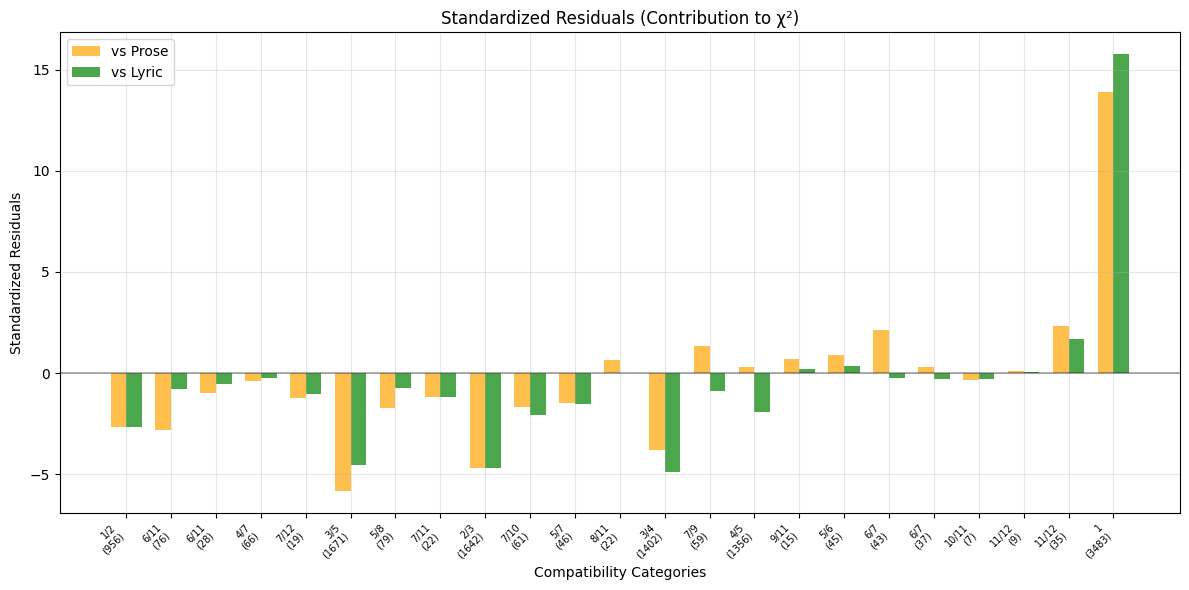


PROSE BASELINE - Contribution Analysis:
            1/2: Obs= 956, Exp=1041.8, Residual= -2.66, Contrib=  7.07
           6/11: Obs=  76, Exp= 104.8, Residual= -2.81, Contrib=  7.90
           6/11: Obs=  28, Exp=  33.6, Residual= -0.97, Contrib=  0.94
            4/7: Obs=  66, Exp=  69.4, Residual= -0.41, Contrib=  0.17
           7/12: Obs=  19, Exp=  25.2, Residual= -1.24, Contrib=  1.53
            3/5: Obs=1671, Exp=1926.7, Residual= -5.82, Contrib= 33.93
            5/8: Obs=  79, Exp=  96.0, Residual= -1.74, Contrib=  3.02
           7/11: Obs=  22, Exp=  28.3, Residual= -1.18, Contrib=  1.39
            2/3: Obs=1642, Exp=1843.2, Residual= -4.69, Contrib= 21.96
           7/10: Obs=  61, Exp=  75.6, Residual= -1.68, Contrib=  2.82
            5/7: Obs=  46, Exp=  57.4, Residual= -1.50, Contrib=  2.25
           8/11: Obs=  22, Exp=  19.2, Residual=  0.63, Contrib=  0.40
            3/4: Obs=1402, Exp=1551.9, Residual= -3.80, Contrib= 14.48
            7/9: Obs=  59, Exp=  49.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction

def decimal_to_fraction(x, max_denominator=12):
    """Convert decimal to nearest fraction with denominator <= max_denominator"""
    return Fraction(x).limit_denominator(max_denominator)

# ------------------------------ #
# Visualize distributions        #
# ------------------------------ #

# Plot 1: Bar chart comparing observed vs both expected distributions
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 6))

x_pos = np.arange(len(sorted_keys_prose))
width = 0.25

bars1 = ax1.bar(x_pos - width, obs_counts_prose, width, label='Pindar', alpha=0.8)
bars2 = ax1.bar(x_pos, exp_counts_prose, width, label='Prose Baseline', alpha=0.8)
bars3 = ax1.bar(x_pos + width, exp_counts_lyr, width, label='Lyric Baseline', alpha=0.8)

ax1.set_xlabel('Compatibility Scores')
ax1.set_ylabel('Position Counts')
ax1.set_title('Pindar vs Baseline Distributions (23 possible outcomes)')
ax1.set_xticks(x_pos)
# Convert decimal labels to fractions with counts
fraction_labels = [f"{str(decimal_to_fraction(float(key)))}\n({obs_counts_prose[i]})" 
                   for i, key in enumerate(sorted_keys_prose)]
ax1.set_xticklabels(fraction_labels, rotation=45, ha='right', fontsize=7)
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('media/significance/outcome_bins.png', dpi=600)
plt.show()

# Plot 1b: Same chart with log10 y-axis
fig1b, ax1b = plt.subplots(1, 1, figsize=(12, 6))

bars1b = ax1b.bar(x_pos - width, obs_counts_prose, width, label='Pindar', alpha=0.8)
bars2b = ax1b.bar(x_pos, exp_counts_prose, width, label='Prose Baseline', alpha=0.8)
bars3b = ax1b.bar(x_pos + width, exp_counts_lyr, width, label='Lyric Baseline', alpha=0.8)

ax1b.set_xlabel('Compatibility Scores')
ax1b.set_ylabel('Position Counts (log₁₀ scale)')
ax1b.set_title('Pindar vs Baseline Distributions - Log Scale (23 possible outcomes)')
ax1b.set_xticks(x_pos)
ax1b.set_xticklabels(fraction_labels, rotation=45, ha='right', fontsize=7)
ax1b.set_yscale('log')
ax1b.legend()
ax1b.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('media/significance/outcome_bins_log.png', dpi=600)
plt.show()

# Plot 1c: Same chart excluding bins with less than 100 counts
# Filter to only include bins with >= 100 observed counts
threshold = 100
mask = obs_counts_prose >= threshold
filtered_indices = np.where(mask)[0]

if len(filtered_indices) > 0:
    fig1c, ax1c = plt.subplots(1, 1, figsize=(12, 6))
    
    filtered_x_pos = np.arange(len(filtered_indices))
    filtered_obs_prose = obs_counts_prose[mask]
    filtered_exp_prose = exp_counts_prose[mask]
    filtered_exp_lyr = exp_counts_lyr[mask]
    filtered_keys = [sorted_keys_prose[i] for i in filtered_indices]
    
    bars1c = ax1c.bar(filtered_x_pos - width, filtered_obs_prose, width, label='Pindar', alpha=0.8)
    bars2c = ax1c.bar(filtered_x_pos, filtered_exp_prose, width, label='Prose Baseline', alpha=0.8)
    bars3c = ax1c.bar(filtered_x_pos + width, filtered_exp_lyr, width, label='Lyric Baseline', alpha=0.8)
    
    ax1c.set_xlabel('Compatibility Scores')
    ax1c.set_ylabel('Position Counts')
    ax1c.set_title(f'Pindar vs Baseline Distributions - Bins with ≥{threshold} counts ({len(filtered_indices)} bins)')
    ax1c.set_xticks(filtered_x_pos)
    # Convert decimal labels to fractions with counts
    filtered_fraction_labels = [f"{str(decimal_to_fraction(float(key)))}\n({filtered_obs_prose[i]})" 
                                for i, key in enumerate(filtered_keys)]
    ax1c.set_xticklabels(filtered_fraction_labels, rotation=45, ha='right', fontsize=8)
    ax1c.legend()
    ax1c.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'media/significance/outcome_bins_filtered_{threshold}.png', dpi=600)
    plt.show()
else:
    print(f"No bins with counts >= {threshold}")

# Plot 2: Residuals comparison for both baselines
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 6))

residuals_prose = (obs_counts_prose - exp_counts_prose) / np.sqrt(exp_counts_prose)
residuals_lyr = (obs_counts_lyr - exp_counts_lyr) / np.sqrt(exp_counts_lyr)

width_res = 0.35
bars4 = ax2.bar(x_pos - width_res/2, residuals_prose, width_res, 
                label='vs Prose', alpha=0.7, color='orange')
bars5 = ax2.bar(x_pos + width_res/2, residuals_lyr, width_res, 
                label='vs Lyric', alpha=0.7, color='green')

ax2.set_xlabel('Compatibility Categories')
ax2.set_ylabel('Standardized Residuals')
ax2.set_title('Standardized Residuals (Contribution to χ²)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(fraction_labels, rotation=45, ha='right', fontsize=7)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ------------------------------ #
# Additional analysis            #
# ------------------------------ #

# Analysis for prose baseline
std_residuals_prose = (obs_counts_prose - exp_counts_prose) / np.sqrt(exp_counts_prose)
chi2_contributions_prose = std_residuals_prose**2

print("\n" + "="*60)
print("PROSE BASELINE - Contribution Analysis:")
print("="*60)
for i, key in enumerate(sorted_keys_prose):
    frac_key = str(decimal_to_fraction(float(key)))
    print(f"{frac_key:>15}: Obs={obs_counts_prose[i]:4d}, Exp={exp_counts_prose[i]:6.1f}, "
          f"Residual={std_residuals_prose[i]:6.2f}, Contrib={chi2_contributions_prose[i]:6.2f}")

print(f"\nSum of contributions: {chi2_contributions_prose.sum():.4f}")
print(f"Chi-square statistic: {chi2_stat_prose:.4f}")

n_prose = obs_total_prose
k_prose = len(sorted_keys_prose)
cramers_v_prose = np.sqrt(chi2_stat_prose / (n_prose * (k_prose - 1)))
print(f"Cramér's V (effect size): {cramers_v_prose:.4f}")

# Analysis for lyric baseline
std_residuals_lyr = (obs_counts_lyr - exp_counts_lyr) / np.sqrt(exp_counts_lyr)
chi2_contributions_lyr = std_residuals_lyr**2

print("\n" + "="*60)
print("LYRIC BASELINE - Contribution Analysis:")
print("="*60)
for i, key in enumerate(sorted_keys_lyr):
    frac_key = str(decimal_to_fraction(float(key)))
    print(f"{frac_key:>15}: Obs={obs_counts_lyr[i]:4d}, Exp={exp_counts_lyr[i]:6.1f}, "
          f"Residual={std_residuals_lyr[i]:6.2f}, Contrib={chi2_contributions_lyr[i]:6.2f}")

print(f"\nSum of contributions: {chi2_contributions_lyr.sum():.4f}")
print(f"Chi-square statistic: {chi2_stat_lyr:.4f}")

n_lyr = obs_total_lyr
k_lyr = len(sorted_keys_lyr)
cramers_v_lyr = np.sqrt(chi2_stat_lyr / (n_lyr * (k_lyr - 1)))
print(f"Cramér's V (effect size): {cramers_v_lyr:.4f}")

## For each canticum

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from fractions import Fraction

from src.stats_comp import compatibility_play, compatibility_canticum
from src.utils.utils import make_chisquare_test

from results import victory_odes

def decimal_to_fraction(x, max_denominator=12):
    """Convert decimal to nearest fraction with denominator <= max_denominator"""
    return Fraction(x).limit_denominator(max_denominator)

chisquare_dict = {}
for responsion_attribute in tqdm(victory_odes):
    if responsion_attribute[:2] == "ol":
        all_comp_scores = compatibility_canticum('data/compiled/triads/ht_olympians_triads.xml', responsion_attribute)
    elif responsion_attribute[:2] == "py":
        all_comp_scores = compatibility_canticum('data/compiled/triads/ht_pythians_triads.xml', responsion_attribute)
    elif responsion_attribute[:2] == "ne":
        all_comp_scores = compatibility_canticum('data/compiled/triads/ht_nemeans_triads.xml', responsion_attribute)
    elif responsion_attribute[:2] == "is":
        all_comp_scores = compatibility_canticum('data/compiled/triads/ht_isthmians_triads.xml', responsion_attribute)

    all_comp_baseline_scores = compatibility_play(f'data/compiled/baselines/triads/prose/baseline_prose_{responsion_attribute}.xml')

    # Output
    chi2_stat, degrees_of_freedom, p_value, sorted_keys, obs_counts, obs_total, exp_counts = make_chisquare_test(all_comp_scores, all_comp_baseline_scores)
    
    # Convert NumPy types to native Python types INSIDE the loop
    chisquare_dict[responsion_attribute] = (
        float(chi2_stat),           # Convert np.float64 to float
        int(degrees_of_freedom),    # Convert to int
        float(p_value),            # Convert np.float64 to float
        list(sorted_keys),          # Ensure it's a list
        obs_counts.tolist(),       # Convert numpy array to list
        int(obs_total),            # Convert np.int64 to int
        exp_counts.tolist()        # Convert numpy array to list
    )

    # ------------------------------ #
    # Visualize distributions        #
    # ------------------------------ #

    # Plot 1: Bar chart comparing observed vs expected
    fig1, ax1 = plt.subplots(1, 1, figsize=(12, 6))

    x_pos = np.arange(len(sorted_keys))
    width = 0.35

    bars1 = ax1.bar(x_pos - width/2, obs_counts, width, label='Observed', alpha=0.8)
    bars2 = ax1.bar(x_pos + width/2, exp_counts, width, label='Expected', alpha=0.8)

    ax1.set_xlabel('Compatibility Categories')
    ax1.set_ylabel('Counts')
    ax1.set_title(f'Observed vs Expected Distributions for {responsion_attribute}')
    ax1.set_xticks(x_pos)
    # Convert decimal labels to fractions with counts
    fraction_labels = [f"{str(decimal_to_fraction(float(key)))}\n({obs_counts[i]})" 
                       for i, key in enumerate(sorted_keys)]
    ax1.set_xticklabels(fraction_labels, rotation=45, ha='right', fontsize=7)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'media/significance/chisquare_{responsion_attribute}_distributions.png')
    plt.close()

    # Plot 2: Residuals (contribution to chi-square)
    fig2, ax2 = plt.subplots(1, 1, figsize=(12, 6))

    residuals = (obs_counts - exp_counts) / np.sqrt(exp_counts)
    colors = ['red' if r > 0 else 'blue' for r in residuals]

    bars3 = ax2.bar(x_pos, residuals, color=colors, alpha=0.7)
    ax2.set_xlabel('Compatibility Scores')
    ax2.set_ylabel('Standardized Residuals')
    ax2.set_title(f'Standardized Residuals for {responsion_attribute} (Contribution to χ²)')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(fraction_labels, rotation=45, ha='right', fontsize=7)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'media/significance/chisquare_{responsion_attribute}_residuals.png')
    plt.close()







# # Write to file with consistent formatting
# with open("results.py", "a", encoding="utf-8") as f:
#     f.write("\node_chisquare = {\n")
#     for key, value in chisquare_dict.items():
#         chi2_stat, dof, p_val, keys, obs, total, exp = value
#         f.write(f"    '{key}': ({chi2_stat:.6f}, {dof}, {p_val:.2e}, "
#                 f"{keys}, {obs}, {total}, {exp}),\n")
#     f.write("}\n")

  0%|          | 0/40 [00:04<?, ?it/s]


KeyboardInterrupt: 